In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
print(train_df['Sex'].value_counts())
print(test_df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
male      266
female    152
Name: Sex, dtype: int64


EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
train_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [15]:
train_df['Age'].mean()

29.69911764705882

In [45]:
#filling the null values in age column using mean operation
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())


In [16]:
#alternative way to fill the null values of age using sex column
mean_age_groupby= train_df.groupby('Sex')['Age'].transform('mean')
train_df['Age']=train_df['Age'].fillna(mean_age_groupby)
train_df['Age'].mean()

29.736034227171306

In [17]:
mean_age_groupby= test_df.groupby('Sex')['Age'].transform('mean')
test_df['Age']=test_df['Age'].fillna(mean_age_groupby)
test_df['Age'].mean()

30.27259734273792

In [19]:
print(train_df['Age'].isna().sum())
print(test_df['Age'].isna().sum())

0
0


In [59]:
test_df.reset_index(drop=True, inplace=True)
dropnull= test_df.dropna(axis=0,inplace=True)

In [60]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [39]:
#replace string to value
train_df['Sex']=train_df['Sex'].replace({'male':1,'female':0})
test_df['Sex']=test_df['Sex'].replace({'male':1,'female':0})

In [40]:
X=pd.DataFrame(train_df,columns=['Pclass','Sex','Age','SibSp','Parch','Fare'])
Y=pd.DataFrame(train_df,columns=['Survived'])


In [42]:
X['Age']=X['Age'].astype(int)
test_df['Age']=test_df['Age'].astype(int)

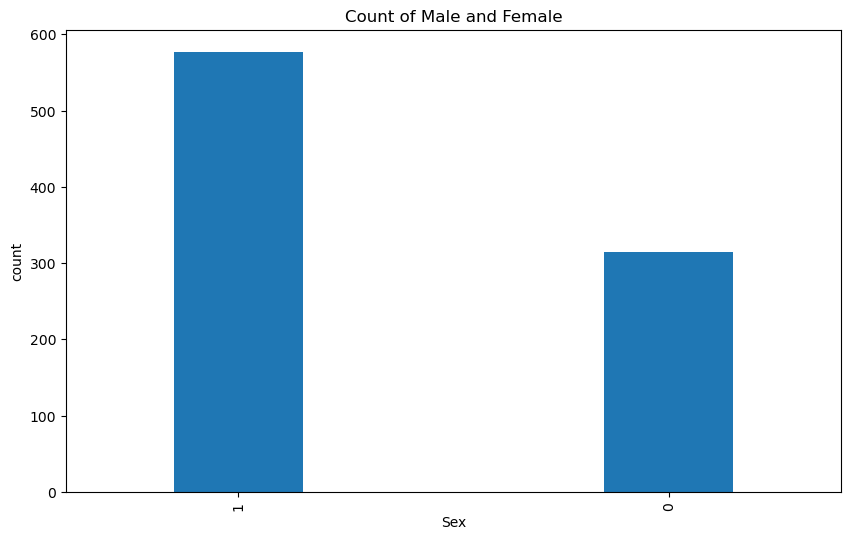

In [43]:
sex= X['Sex'].value_counts()
plt.figure(figsize=(10,6))
sex.plot(kind='bar',width=0.3)
plt.xlabel('Sex')
plt.ylabel('count')
plt.title('Count of Male and Female')
plt.xticks(rotation=90)
plt.show()



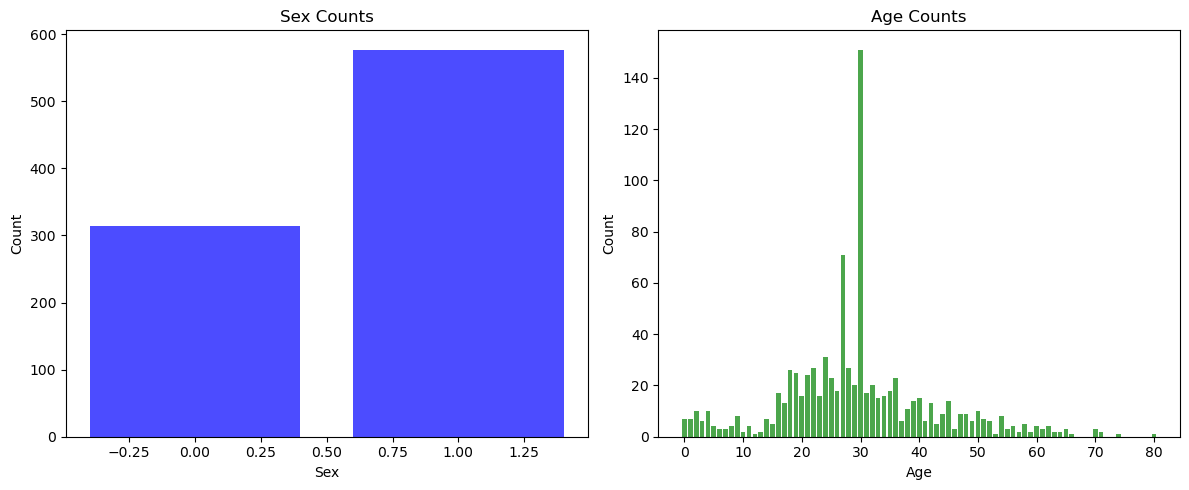

In [44]:
sex_counts = X['Sex'].value_counts()

# Count the occurrences of each age value in 'Age'
age_counts = X['Age'].value_counts()

# Create subplots for Sex and Age counts
plt.figure(figsize=(12, 5))

# Plot for Sex counts
plt.subplot(1, 2, 1)
plt.bar(sex_counts.index, sex_counts.values, color='blue', alpha=0.7)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Counts')

# Plot for Age counts
plt.subplot(1, 2, 2)
plt.bar(age_counts.index, age_counts.values, color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Counts')

plt.tight_layout()  # Ensures subplots do not overlap
plt.show()

In [45]:
X['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [46]:
Y['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

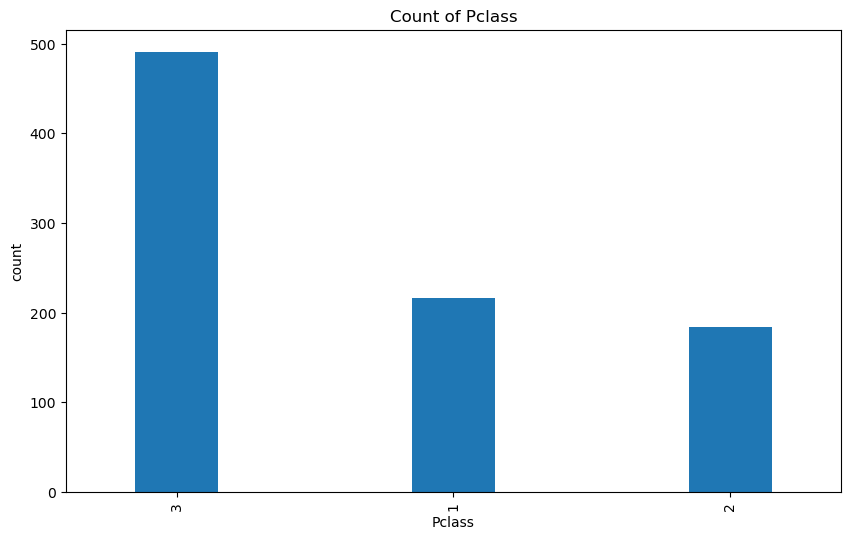

In [48]:
sex= X['Pclass'].value_counts()
plt.figure(figsize=(10,6))
sex.plot(kind='bar',width=0.3)
plt.xlabel('Pclass')
plt.ylabel('count')
plt.title('Count of Pclass')
plt.xticks()
plt.show()



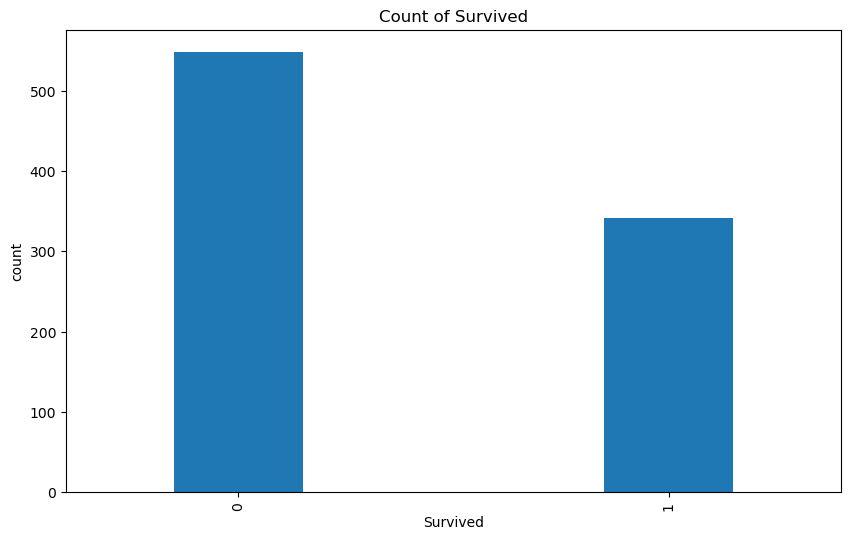

In [49]:
Survival= Y['Survived'].value_counts()
plt.figure(figsize=(10,6))
Survival.plot(kind='bar',width=0.3)
plt.xlabel('Survived')
plt.ylabel('count')
plt.title('Count of Survived')
plt.xticks()
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid= train_test_split(X,Y,test_size=0.2,random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

lg = LogisticRegression()

lg.fit(X_train, y_train)
pred = lg.predict(X_valid)
score_lg = metrics.accuracy_score(y_valid, pred)
print("accuracy: %0.3f", score_lg * 100)
    

accuracy: %0.3f 81.56424581005587


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
from sklearn.metrics import confusion_matrix, classification_report

matrix_lg = confusion_matrix(y_valid, pred)

Text(0.5, 1.0, 'Confusion Matrix for LG')

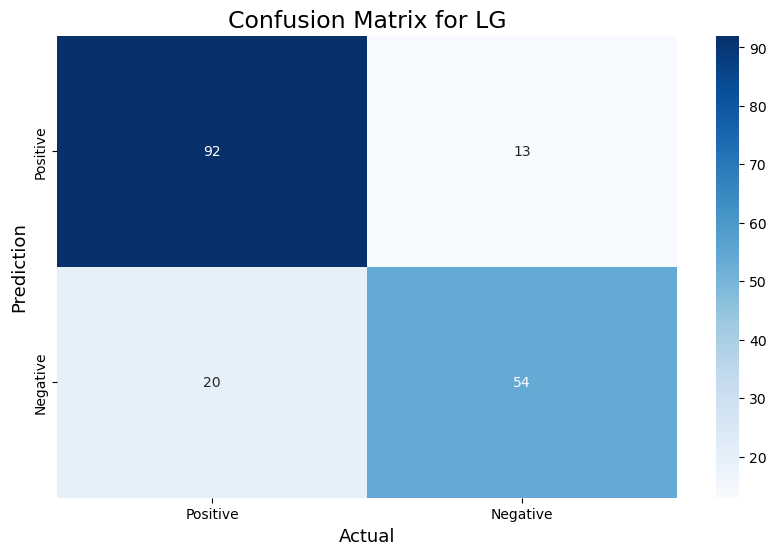

In [54]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(matrix_lg, annot=True, fmt="d", cmap="Blues",xticklabels=['Positive','Negative'], yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for LG',fontsize=17)

In [55]:
import joblib

joblib.dump(lg, 'model.joblib')

load_model = joblib.load('model.joblib')

In [56]:
test_df =pd.DataFrame(test_df,columns=['Pclass','Sex','Age','SibSp','Parch','Fare'])
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
12,1,0,23,1,0,82.2667
14,1,0,47,1,0,61.1750
24,1,0,48,1,3,262.3750
26,1,0,22,0,1,61.9792
28,1,1,41,0,0,30.5000
